In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
fashion_mnist = pd.read_csv('E:/JupyNote/DL Mini Projects/Fashion MNIST Detection/dataset/fashion-mnist_train.csv')

In [5]:
fashion_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,...,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,211,171,191,236,228,172,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,48,153,209,210,187,199,142,157,209,179,199,233,138,44,...,207,121,255,193,183,193,209,224,208,224,203,160,184,223,0,186,216,102,0,0,0,0,0,0,0,0,108,242,253,0,112,255,217,211,227,245,195,194,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,153,168,252,174,136,166,130,123,131,66,0,0,1,0,0,0,0,0,0,2,0,10,157,216,226,208,142,66,115,149,230,190,196,198,172,222,107,...,0,2,182,152,51,89,174,183,168,112,109,181,170,136,108,60,0,4,0,0,0,0,0,0,0,0,0,2,0,5,194,193,204,104,116,241,217,196,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,119,173,239,112,0,189,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,219,224,211,92,52,227,224,127,92,196,237,136,0,...,3,0,4,214,211,213,213,215,213,211,214,220,200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,214,232,229,249,245,248,252,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [44]:
images = fashion_mnist.drop(columns=['label'], axis = 0)
labels = fashion_mnist['label']

In [45]:
images = images.to_numpy()
labels = labels.to_numpy()

In [46]:
images = images / 255.0

In [47]:
images = images.reshape(-1, 28, 28, 1)

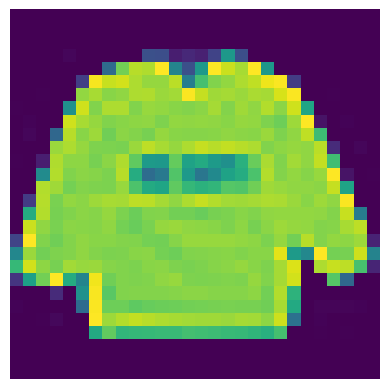

In [52]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [53]:
print(np.unique(labels))

[0 1 2 3 4 5 6 7 8 9]


In [54]:
features_train, features_test, target_train, target_test = train_test_split(images, labels, test_size=0.2, random_state=3)
print(images.shape, features_train.shape, features_test.shape)
print(labels.shape, target_train.shape, target_test.shape)

(60000, 28, 28, 1) (48000, 28, 28, 1) (12000, 28, 28, 1)
(60000,) (48000,) (12000,)


In [55]:
num_of_classes = 10

In [56]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [63]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),

    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_of_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [65]:
history = model.fit(
    features_train,
    target_train,
    validation_split=0.1,
    batch_size=128,
    epochs=10
)

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6358 - loss: 1.0062 - val_accuracy: 0.8010 - val_loss: 0.5124
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7724 - loss: 0.6258 - val_accuracy: 0.8246 - val_loss: 0.4503
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8092 - loss: 0.5406 - val_accuracy: 0.8515 - val_loss: 0.4088
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8306 - loss: 0.4822 - val_accuracy: 0.8631 - val_loss: 0.3764
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8428 - loss: 0.4511 - val_accuracy: 0.8763 - val_loss: 0.3530
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8563 - loss: 0.4181 - val_accuracy: 0.8813 - val_loss: 0.3340
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8660 - loss: 0.3902 - val_accuracy: 0.8760 - val_loss: 0.3315
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8735 - loss: 0.3715 - val_accu

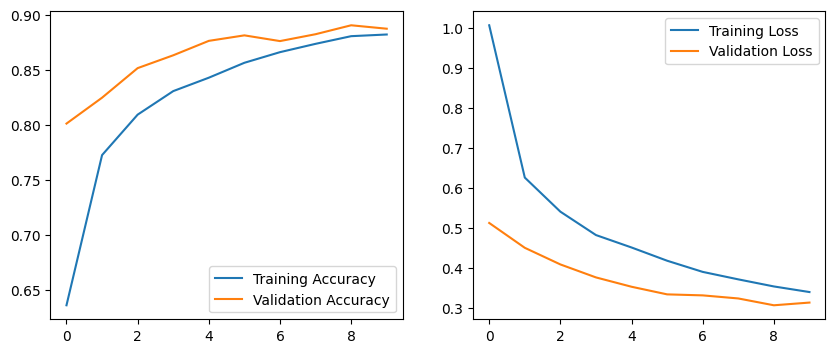

In [83]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [66]:
loss, accuracy = model.evaluate(features_test, target_test)
print(f'Accuracy on testing data is {accuracy * 100 :.2f}%')

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.2868
Accuracy on testing data is 89.92%


In [85]:
testing_df = pd.read_csv('E:/JupyNote/DL Mini Projects/Fashion MNIST Detection/dataset/fashion-mnist_test.csv')

In [86]:
testing_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,...,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,1,1,1,0,0,0,0,0,0,1,2,0,0,0,3,46,174,249,67,0,94,210,61,14,212,157,37,0,...,0,141,201,191,188,194,187,187,191,193,195,199,199,218,161,0,0,0,0,0,0,0,0,0,0,0,0,1,0,212,240,213,239,233,239,231,232,236,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,210,241,222,171,220,199,236,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,227,217,218,222,189,216,201,215,103,0,...,0,0,0,0,0,227,234,186,0,92,244,240,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,244,206,0,87,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,0,0,0,0,0,140,116,85,109,121,63,0,0,0,0,0,0,0,0,0,0,70,58,58,68,68,101,114,72,189,233,184,82,254,55,80,72,...,65,0,0,0,2,2,2,2,2,2,2,0,0,2,0,2,140,65,50,0,0,0,0,0,0,0,29,19,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,127,185,198,213,239,126,237,255,236,173,4,0,0,0,0,0,0,0,0,0,0,59,219,248,231,254,27,3,221,253,242,79,190,123,228,230,238,...,15,164,203,119,156,188,190,209,197,199,213,213,198,193,239,98,130,68,90,55,0,0,0,0,0,255,243,255,4,209,255,254,255,255,255,255,255,255,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,202,166,180,207,217,228,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195,246,219,234,245,239,244,246,236,226,236,11,0,...,0,0,0,0,0,0,0,0,0,89,26,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,70,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [96]:
testing_images = testing_df.drop(columns=['label'], axis = 0)
testing_labels = testing_df['label']

In [97]:
testing_images = testing_images.to_numpy()
testing_labels = testing_labels.to_numpy()

In [98]:
testing_images = testing_images / 255.0

In [105]:
print(len(testing_images))

10000


In [116]:
correct_prediction = 0
for i in range (0,len(testing_images)):
    testing_img = testing_images[i]
    testing_img = testing_img.reshape(1, 28, 28, 1)
    prediction = model.predict(testing_img, verbose=0)
    if np.argmax(prediction) == testing_labels[i]:
        correct_prediction = correct_prediction + 1

In [117]:
testing_accuracy = (correct_prediction / len(testing_images)) * 100
print(f'Accuracy of real test data is {testing_accuracy :.2f}')

Accuracy of real test data is 89.95


In [119]:
testing_images = testing_images.reshape(-1, 28, 28, 1)

In [123]:
real_testing_loss, real_testing_accuracy = model.evaluate(testing_images,testing_labels)
print(f'Accuracy of real test data is {real_testing_accuracy * 100 :.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.2880
Accuracy of real test data is 89.95
